# Cake Splitting Problem

In this problem, we will split a cake between two people where the constraint is the two will have to come to an agreement upon two conditions : 
<br>
<li> If either one, does not agree on the splitted take, no one would get any cake
<li> The sum of the agreed pieces must sum up to 10 pieces
<br><br>
Now we will generate some strategies and see which strategy works the best with out population

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def replicator_dynamics(frequencies):
    """ Runs a round of the game where people get their
    demand if the sum of two players is less than or equal
    to 10. Otherwise they'll receive zero. Then each player
    chooses one person from the population at random and will
    adopt their strategy if they had a greater payoff than them.
    """
    # Calculate the payoffs
    payoffs = np.zeros((11, 11))
    for i in range(11):
        for j in range(11):
            if i + j <= 10:
                payoffs[i][j] = i
            else:
                payoffs[i][j] += 0
    
    # Calculate the fitnesses
    fitnesses = payoffs / np.sum(payoffs)
    
    # Calculate the new frequencies
    new_frequencies = np.zeros(11)
    for i1 in range(11):
        for j1 in range(11):
            for i2 in range(11):
                for j2 in range(11):
                    if payoffs[i1][j1] >= payoffs[i2][j2]:
                        new_frequencies[i1] += frequencies[i1] * frequencies[j1] * frequencies[i2] * frequencies[j2]
                    else:
                        new_frequencies[i2] += frequencies[i1] * frequencies[j1] * frequencies[i2] * frequencies[j2]

    return new_frequencies / np.sum(new_frequencies)

In [3]:
def plot_strategy_frequencies(frequencies_over_turns):
    strategies = np.arange(11)
    turns = len(frequencies_over_turns)
    # Assign different color to each strategy
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:orange', 'tab:purple', 'tab:brown']
    strategies_over_turns = np.array(frequencies_over_turns).T
    
    for i in range(len(strategies_over_turns)):
        plt.plot(np.arange(turns), strategies_over_turns[i], color=colors[i], label=f"Demand {i}")
    
    plt.xlabel('Turn')
    plt.ylabel('Frequency')
    plt.title('Frequency of Demands in the Population over Turns')
    plt.legend()
    plt.show()

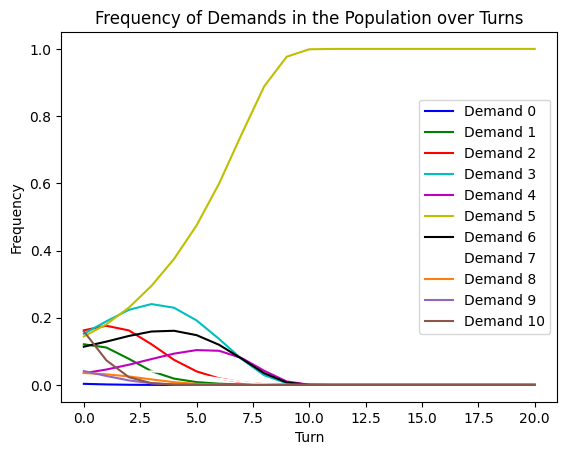

In [5]:
initial_frequencies = np.random.random(11)
initial_frequencies /= np.sum(initial_frequencies)

# Simulate the replicator dynamics over 10 turns
turns = 20
frequencies_over_turns = [initial_frequencies]

replicator_dynamics(initial_frequencies)
for i in range(turns) : 
    frequencies_over_turns.append(replicator_dynamics(frequencies_over_turns[-1])) 
plot_strategy_frequencies(frequencies_over_turns)

## Analasys

In the code above that we appended to the original code, we will run the simulation for <b>20 turns</b> and then plot the strategies. <br>
As you could see, the population will have tendency to demand 5 pieces after some tries and this decision makes sence as it is the nash equilibrium where
both players get equal pieces.

## Behavior for other turns

Now lets set the number of turns and draw the graph to see the results 

In [6]:
def simulate(number_of_turns):
    initial_frequencies = np.random.random(11)
    initial_frequencies /= np.sum(initial_frequencies)

    # Simulate the replicator dynamics over 10 turns
    frequencies_over_turns = [initial_frequencies]

    replicator_dynamics(initial_frequencies)
    for i in range(number_of_turns) : 
        frequencies_over_turns.append(replicator_dynamics(frequencies_over_turns[-1])) 
    plot_strategy_frequencies(frequencies_over_turns)

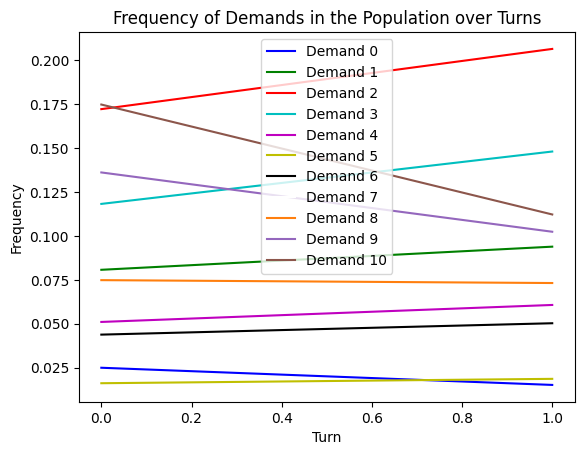

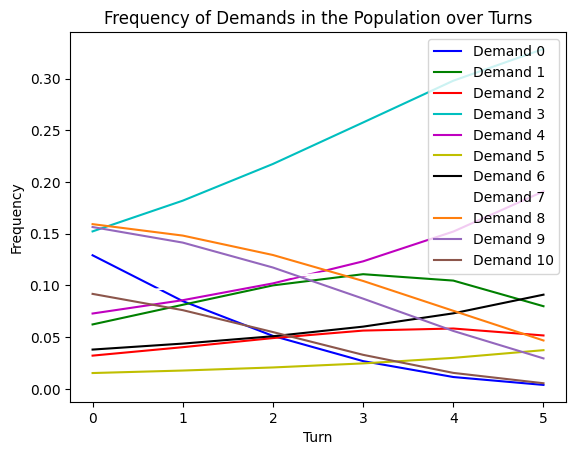

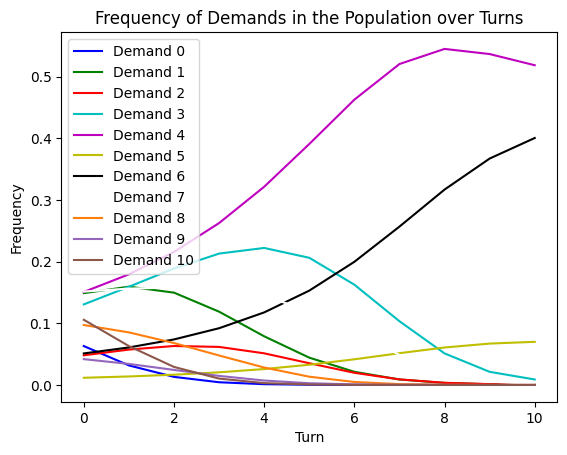

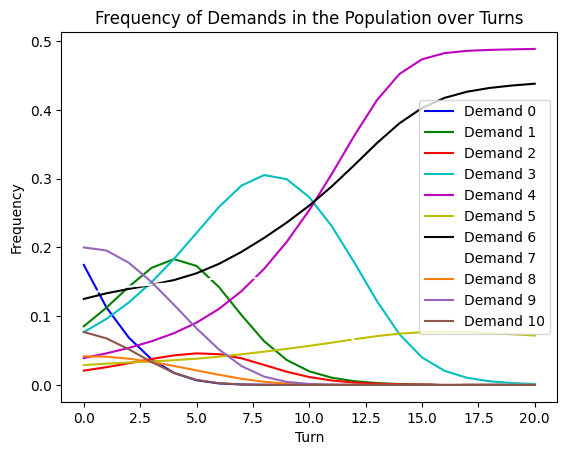

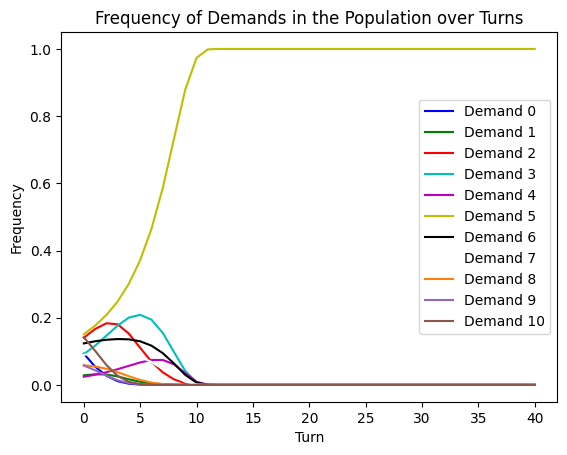

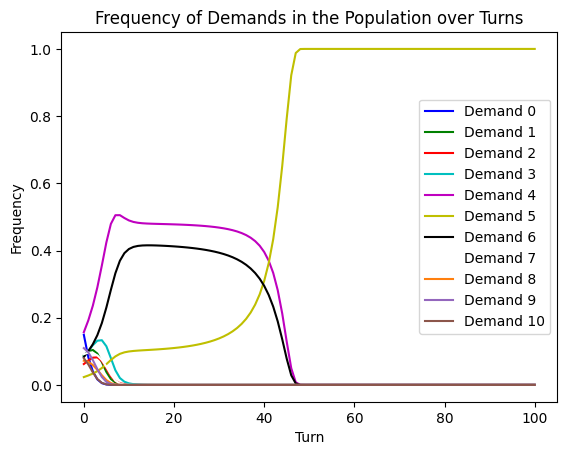

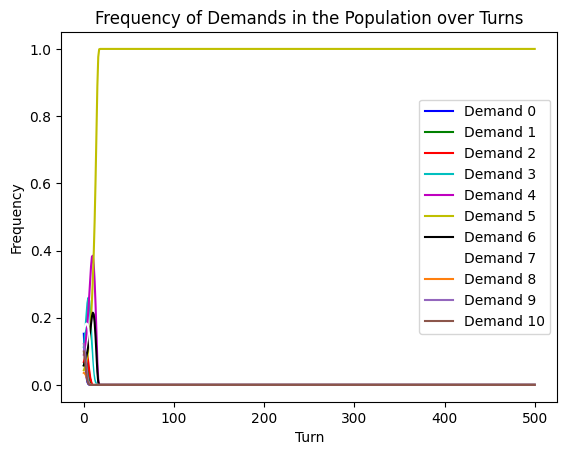

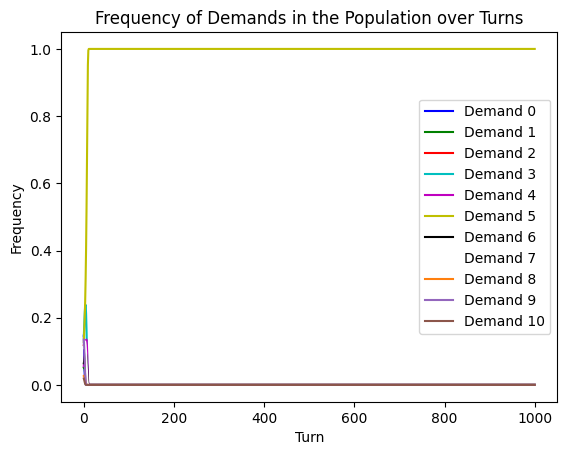

In [7]:
for number_of_turns in [1,5,10,20,40,100,500,1000] :
    simulate(number_of_turns)

## Final conclusions

We see that in a society, the more we go forward, the more willing people are to cooperate and there is a sense in the population where as the take
would be equal.